# Geopandas y Municipios 

In [32]:
import pandas as pd
import shapely
import geopandas as gpd
import get_centroides as georefar
import descartes
import geoplot
import pickle
import matplotlib.pyplot as plt

In [5]:
# Read polygon de provincias de UNCUYO
# source: https://uncuyo.carto.com/tables/provincias_argentinas_polygon/public/map
gpd.read_file('./poligonos/provincias_argentinas_polygon_UNCUYO.geojson')

,cartodb_id,description,name,provincia,id,codpcia,c_indec,id_dyp,geometry
0,1,,,Ciudad Autónoma de Buenos Aires,1,1,2,1,"MULTIPOLYGON (((-58.39007 -34.66230, -58.39037..."
1,3,,,Catamarca,3,3,10,4,"MULTIPOLYGON (((-66.59111 -26.17318, -66.58961..."
2,4,,,Chaco,4,4,22,6,"MULTIPOLYGON (((-62.34757 -24.11021, -62.34407..."
3,5,,,Chubut,5,5,26,7,"MULTIPOLYGON (((-71.77158 -41.99955, -71.67446..."
4,7,,,Corrientes,7,7,18,5,"MULTIPOLYGON (((-58.89298 -27.99935, -58.89182..."
5,8,,,Entre Ríos,8,8,30,8,"MULTIPOLYGON (((-59.66084 -30.34857, -59.65614..."
6,9,,,Formosa,9,9,34,9,"MULTIPOLYGON (((-62.34465 -22.45495, -62.33563..."
7,10,,,Jujuy,10,10,38,10,"MULTIPOLYGON (((-64.44379 -23.63491, -64.44048..."
8,11,,,La Pampa,11,11,42,11,"MULTIPOLYGON (((-65.10672 -34.99768, -65.02612..."
9,12,,,La Rioja,12,12,46,12,"MULTIPOLYGON (((-69.09436 -27.77274, -69.01274..."


In [6]:
# Read poligonos por el IGN
# https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG
gpd.read_file('./poligonos/provincia_IGN.json')

,gid,entidad,objeto,fna,gna,nam,in1,fdc,sag,geometry
0,1,0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,02,Geografía,IGN,"MULTIPOLYGON (((-58.34189 -34.63110, -58.34240..."
1,2,0,Provincia,Provincia del Neuquén,Provincia,Neuquén,58,Geografía,IGN,"MULTIPOLYGON (((-70.39345 -36.15526, -70.39325..."
2,3,0,Provincia,Provincia de La Pampa,Provincia,La Pampa,42,Geografía,IGN,"MULTIPOLYGON (((-64.76547 -40.78351, -64.76618..."
3,4,0,Provincia,Provincia de Mendoza,Provincia,Mendoza,50,Geografía,IGN,"MULTIPOLYGON (((-69.12570 -32.00283, -69.12296..."
4,5,0,Provincia,Provincia de San Luis,Provincia,San Luis,74,Geografía,IGN,"MULTIPOLYGON (((-67.05547 -31.85605, -67.05000..."
5,6,0,Provincia,Provincia de Córdoba,Provincia,Córdoba,14,Geografía,IGN,"MULTIPOLYGON (((-63.87035 -29.62387, -63.86959..."
6,7,0,Provincia,Provincia de Santa Fe,Provincia,Santa Fe,82,Geografía,IGN,"MULTIPOLYGON (((-60.27271 -33.26386, -60.27322..."
7,8,0,Provincia,Provincia de Entre Ríos,Provincia,Entre Ríos,30,Geografía,IGN,"MULTIPOLYGON (((-58.58138 -30.16010, -58.58102..."
8,9,0,Provincia,Provincia de San Juan,Provincia,San Juan,70,Geografía,IGN,"MULTIPOLYGON (((-69.62981 -28.39369, -69.62956..."
9,10,0,Provincia,Provincia de La Rioja,Provincia,La Rioja,46,Geografía,IGN,"MULTIPOLYGON (((-68.52083 -27.81988, -68.52011..."


In [38]:
# Importar datos geograficos de GeoRefAr
#GeoRefAr
import requests
import urllib
def request(endpoint , **kwargs):
    API_BASE_URL = "https://apis.datos.gob.ar/georef/api/"
    url =  f"{API_BASE_URL}{endpoint}?{urllib.parse.urlencode(kwargs)}"
    print(url)

In [28]:
request('localidades', provincia='Buenos Aires', formato = 'shp' )
# No devuelve polygonos solo centroides.

https://apis.datos.gob.ar/georef/api/localidades?provincia=Buenos+Aires&formato=shp


Se ve que el instituto Geografico Nacional cuenta con la base de datos mas completa y mas detalla. Aparte utilizan los codigos del indec para todos sus niveles (localidad, municipio, departamento y provincia) esto sera util para mergear los datos con el output de GeoRefAr

## Importando municipios del IGN

In [2]:
# Instituto Geografico Nacional
# https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG
MUNICIPIO = gpd.read_file('./poligonos/municipio_IGN.json')

In [13]:
MUNICIPIO[MUNICIPIO.nam == 'San Isidro']

,gid,entidad,objeto,fna,gna,nam,in1,fdc,sag,geometry
324,234,0,Municipio,Municipio San Isidro,Municipio,San Isidro,180143,Dirección de Estadística y Censos,Dirección de Estadística y Censos,"MULTIPOLYGON (((-59.35968 -29.46633, -59.35953..."
701,599,0,Municipio,Municipio San Isidro,Municipio,San Isidro,060756,ARBA - Gerencia de Servicios Catastrales,ARBA - Gerencia de Servicios Catastrales,"MULTIPOLYGON (((-58.48032 -34.48861, -58.48036..."


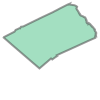

In [37]:
MUNICIPIO[MUNICIPIO.nam == 'San Isidro'].loc[701].geometry

In [42]:
MUNICIPIO.dtypes

gid            int64
entidad        int64
objeto        object
fna           object
gna           object
nam           object
in1           object
fdc           object
sag           object
geometry    geometry
dtype: object

## Merge de los datos aumentados con los poligonos en el nivel municipio

In [3]:
USUARIOS = pickle.load(open('HI_localizacion_socios.pickle', 'rb'))
USUARIOS.sample(5)

,anio_ing,nacionalidad,provincia_part,loc_part,cp_part,user_id,provincia_por_cp,localidad_por_cp,departamento_por_cp,localidad_por_API,...,provincia_por_API,provincia_id_API,centroide_lat_localidad,centroide_lon_localidad,centroide_lat_municipio,centroide_lon_municipio,centroide_lat_departamento,centroide_lon_departamento,centroide_lat_provincia,centroide_lon_provincia
copy_index,,,,,,,,,,,,,,,,,,,,,
42925,2017,AR,BA,HURLINGHAM,1686,ID_42925,BUENOS AIRES,HURLINGHAM,None,HURLINGHAM,...,BUENOS AIRES,6,-34.5931,-58.6357,-34.5992,-58.6497,-34.5992,-58.6497,-36.676942,-60.558832
1823,2014,AR,BA,VILLA LYNCH,1672,ID_1823,BUENOS AIRES,VILLA LYNCH,None,VILLA LYNCH,...,BUENOS AIRES,6,-34.5901,-58.5234,-34.5526,-58.5643,-34.5526,-58.5643,-36.676942,-60.558832
52693,2017,AR,BA,VILLA LUZURIAGA,1754,ID_52693,BUENOS AIRES,NO UNICA LOCALIDAD,None,VILLA LUZURIAGA,...,BUENOS AIRES,6,-34.6731,-58.5939,-34.7702,-58.6254,-34.7702,-58.6254,-36.676942,-60.558832
52696,2017,AR,CF,CABA,1089,ID_52696,CIUDAD AUTONOMA DE BUENOS AIRES,BALVANERA,COMUNA 3,BALVANERA,...,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,-34.6091,-58.4031,NaN,NaN,-34.6138,-58.4027,-34.614493,-58.445856
42584,2017,AR,CF,CABA,1407,ID_42584,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,...,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,-34.614493,-58.445856


In [4]:
MUNICIPIO.in1 = MUNICIPIO.in1.astype(int)
us_index = USUARIOS.index
us_muni = USUARIOS.merge(MUNICIPIO, left_on = 'municipio_id_API', right_on= 'in1', how = 'left').set_index(us_index).copy()

In [5]:
us_muni = gpd.geodataframe.GeoDataFrame(us_muni)

In [6]:
pd.set_option('display.max_columns', 50)  # Para ver todas las filas
us_muni.drop( columns = ['gid',	'entidad', 'objeto','fna','gna','nam','in1','fdc','sag'], inplace=True)

In [25]:
us_muni.head()

,anio_ing,nacionalidad,provincia_part,loc_part,cp_part,user_id,provincia_por_cp,localidad_por_cp,departamento_por_cp,localidad_por_API,localidad_id_API,municipio_por_API,municipio_id_API,departamento_por_API,departamento_id_API,provincia_por_API,provincia_id_API,centroide_lat_localidad,centroide_lon_localidad,centroide_lat_municipio,centroide_lon_municipio,centroide_lat_departamento,centroide_lon_departamento,centroide_lat_provincia,centroide_lon_provincia,geometry
copy_index,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2014,AR,CF,CABA,1416,ID_0,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,-34.614493,-58.445856,None
1,2014,AR,CF,CABA,1416,ID_1,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,-34.614493,-58.445856,None
2,2014,AR,BA,HURLINGHAM,1686,ID_2,BUENOS AIRES,HURLINGHAM,None,HURLINGHAM,06408010001,HURLINGHAM,60408,HURLINGHAM,6408,BUENOS AIRES,6,-34.5931,-58.6357,-34.5992,-58.6497,-34.5992,-58.6497,-36.676942,-60.558832,"MULTIPOLYGON (((-58.61650 -34.58804, -58.61652..."
3,2014,AR,BA,ZARATE,2800,ID_3,BUENOS AIRES,NO UNICA LOCALIDAD,None,ZARATE,NaN,ZÁRATE,60882,ZÁRATE,6882,BUENOS AIRES,6,-34.0999,-59.0246,-33.9971,-59.1285,-33.9971,-59.1285,-36.676942,-60.558832,"MULTIPOLYGON (((-59.16536 -33.81419, -59.15979..."
4,2014,AR,CF,CABA,1425,ID_4,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,-34.614493,-58.445856,None


In [7]:
us_muni[us_muni.provincia_id_API.isna()] # dos datos super incompletos

,anio_ing,nacionalidad,provincia_part,loc_part,cp_part,user_id,provincia_por_cp,localidad_por_cp,departamento_por_cp,localidad_por_API,localidad_id_API,municipio_por_API,municipio_id_API,departamento_por_API,departamento_id_API,provincia_por_API,provincia_id_API,centroide_lat_localidad,centroide_lon_localidad,centroide_lat_municipio,centroide_lon_municipio,centroide_lat_departamento,centroide_lon_departamento,centroide_lat_provincia,centroide_lon_provincia,geometry
copy_index,,,,,,,,,,,,,,,,,,,,,,,,,,
34425,2016,AR,CF,None,1884,ID_34425,BUENOS AIRES,NO UNICA LOCALIDAD,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
49664,2018,AR,CF,None,1884,ID_49664,BUENOS AIRES,NO UNICA LOCALIDAD,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
54967,2018,AR,NaN,None,0,ID_54967,CP INDEFINIDO,CP INDEFINIDO,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
55075,2016,AR,NaN,None,0,ID_55075,CP INDEFINIDO,CP INDEFINIDO,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
55151,2017,AR,NaN,None,0,ID_55151,CP INDEFINIDO,CP INDEFINIDO,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64855,2018,AR,NaN,None,1752,ID_64855,BUENOS AIRES,NO UNICA LOCALIDAD,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
64856,2018,AR,NaN,None,1752,ID_64856,BUENOS AIRES,NO UNICA LOCALIDAD,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
65178,2016,AR,NaN,None,0,ID_65178,CP INDEFINIDO,CP INDEFINIDO,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


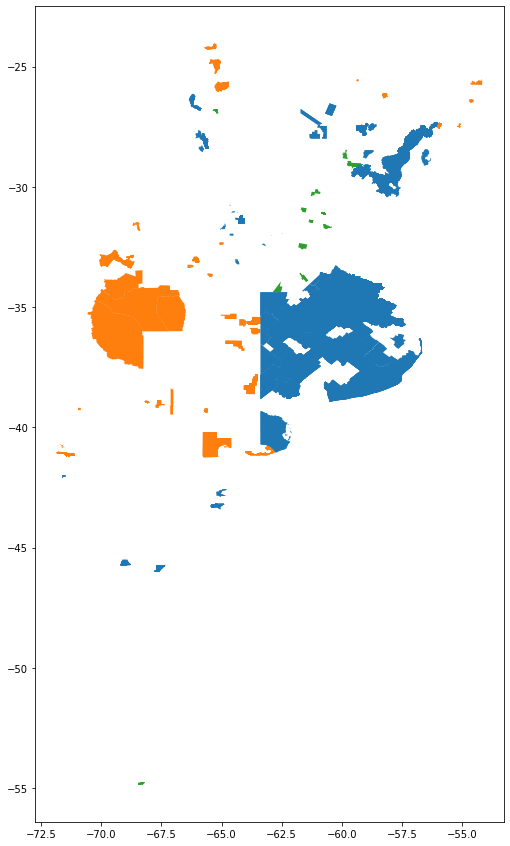

In [9]:
# Elijo una columna random para postear
fig = us_muni[us_muni.provincia_id_API != 'NO HUBO REQUEST'].plot(column = 'provincia_id_API',
                                                                  figsize=(15,15))

In [11]:
us_muni_clean = us_muni[(us_muni.provincia_id_API.notna()) &
                        (us_muni.provincia_id_API != 'NO HUBO REQUEST') &
                        (us_muni.municipio_id_API.notna())]
# Vamos a remover los missing y los no request
# Vamos a usar una plantilla de la Republica Argentina
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) #usamos una plantilla

<AxesSubplot:>

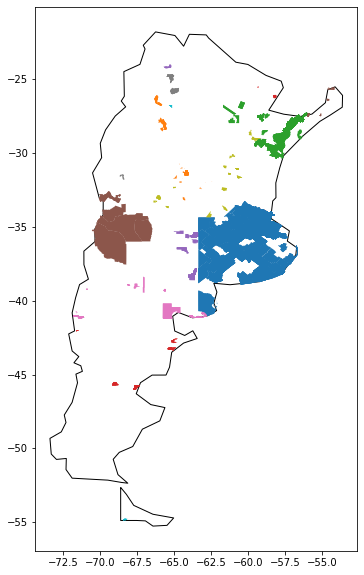

In [12]:
ax = world[world.name == 'Argentina'].plot(color='white', edgecolor='black', figsize = (10,10))
us_muni_clean.plot(column = 'provincia_id_API', ax = ax, edgecolor='None')

In [13]:
# Parece ser que todo anda bien. En este momento no tengo datos mas alla de la localizacion de los usuarios. 
# Si tuviera algun dato relevante podria intentar plotearlo. Vamos a hacer un simple conteo para contar con datos para agregar.
gby_geo = us_muni_clean.groupby(['municipio_id_API','municipio_por_API']).aggregate('count').sort_values(by = 'nacionalidad', ascending= False).reset_index()
gby_geo['cantidad'] = gby_geo.nacionalidad
gby_geo.sample(2)

,municipio_id_API,municipio_por_API,anio_ing,nacionalidad,provincia_part,loc_part,cp_part,user_id,provincia_por_cp,localidad_por_cp,departamento_por_cp,localidad_por_API,localidad_id_API,departamento_por_API,departamento_id_API,provincia_por_API,provincia_id_API,centroide_lat_localidad,centroide_lon_localidad,centroide_lat_municipio,centroide_lon_municipio,centroide_lat_departamento,centroide_lon_departamento,centroide_lat_provincia,centroide_lon_provincia,geometry,cantidad
72,60343,GENERAL PAZ,9,9,6,9,9,9,9,9,0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
30,60778,SAN VICENTE,68,68,66,68,68,68,68,68,0,68,21,68,68,68,68,68,68,68,68,68,68,68,68,68,68


In [14]:
us_muni_cantidad = us_muni_clean.merge(gby_geo.loc[:,['municipio_id_API', 'cantidad']], on = 'municipio_id_API', how='left' )
us_muni_cantidad = gpd.geodataframe.GeoDataFrame(us_muni_cantidad.loc[:,['municipio_por_API','provincia_por_API','cantidad','geometry']])

<AxesSubplot:>

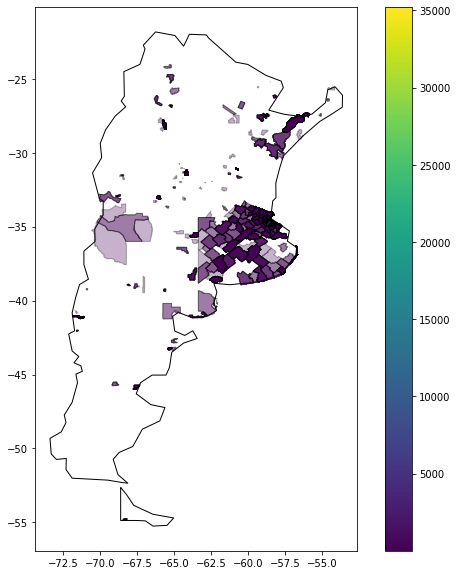

In [15]:
ax = world[world.name == 'Argentina'].plot(color='white', edgecolor='black', figsize = (10,10))
us_muni_cantidad.plot( column = 'cantidad', ax = ax, alpha = 0.3, edgecolor = 'k', legend = True)

In [16]:
# Solo Buenos Aires
PROVINCIAS = gpd.read_file('./poligonos/provincia_IGN.json')
baires = PROVINCIAS[PROVINCIAS.nam == 'Buenos Aires']
capital = PROVINCIAS[PROVINCIAS.nam == 'Ciudad Autónoma de Buenos Aires']

<AxesSubplot:>

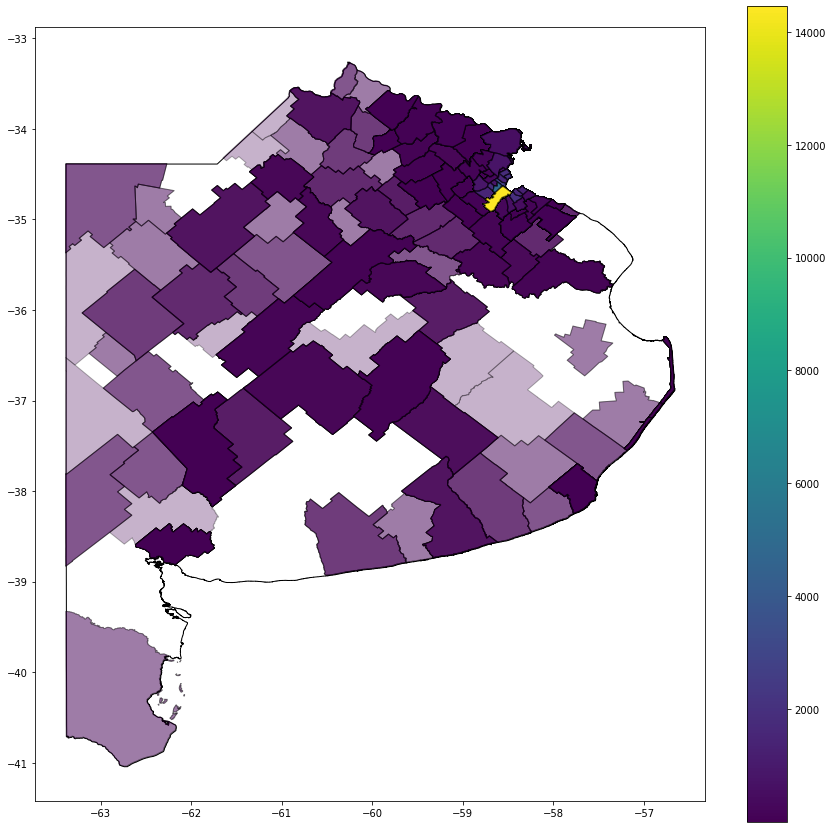

In [17]:
ax = baires.plot(color='white', edgecolor='black', figsize = (15,15))
us_muni_cantidad[us_muni_cantidad.provincia_por_API == 'BUENOS AIRES'].plot( column = 'cantidad', ax = ax, alpha = 0.3,
                                                                            edgecolor = 'k', legend = True)

C:\Users\joaqu\Anaconda3\lib\site-packages\geopandas\plotting.py:510: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


<AxesSubplot:>

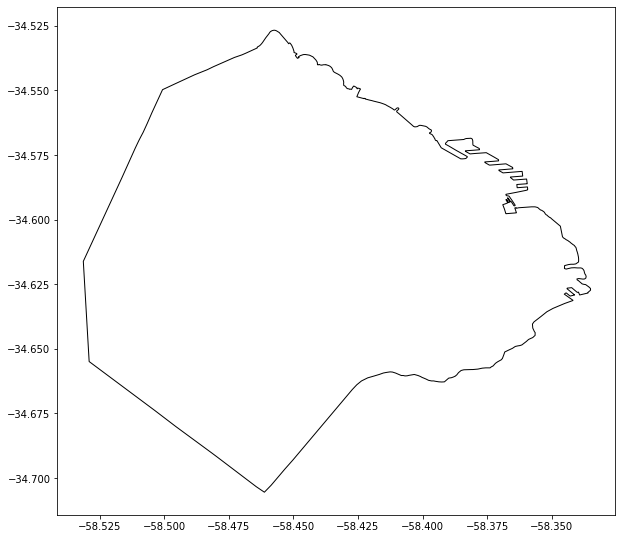

In [18]:
ax = capital.plot(color='white', edgecolor='black', figsize = (10,10))
us_muni_cantidad[us_muni_cantidad.provincia_por_API == 'CIUDAD AUTONOMA DE BUENOS AIRES'].plot( column = 'cantidad', ax = ax, alpha = 0.3,
                                                                            edgecolor = 'k', legend = True)

Algo anda mal. Pareceria no haber datos en la Capital Federal.

In [23]:
us_muni_clean.geometry.isna().sum()

35206

In [20]:
us_muni_clean[us_muni_clean.provincia_por_API == 'CIUDAD AUTÓNOMA DE BUENOS AIRES']

,anio_ing,nacionalidad,provincia_part,loc_part,cp_part,user_id,provincia_por_cp,localidad_por_cp,departamento_por_cp,localidad_por_API,localidad_id_API,municipio_por_API,municipio_id_API,departamento_por_API,departamento_id_API,provincia_por_API,provincia_id_API,centroide_lat_localidad,centroide_lon_localidad,centroide_lat_municipio,centroide_lon_municipio,centroide_lat_departamento,centroide_lon_departamento,centroide_lat_provincia,centroide_lon_provincia,geometry
copy_index,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2014,AR,CF,CABA,1416,ID_0,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,-34.614493,-58.445856,None
1,2014,AR,CF,CABA,1416,ID_1,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,-34.614493,-58.445856,None
4,2014,AR,CF,CABA,1425,ID_4,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,-34.614493,-58.445856,None
5,2014,CA,CF,CABA,1425,ID_5,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,-34.614493,-58.445856,None
10,2014,AR,CF,CABA,1430,ID_10,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,-34.614493,-58.445856,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87396,2019,AR,CF,CDAD AUTONOMA BS AS,1417,ID_87396,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NaN,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NaN,NaN,NaN,NaN,-34.614493,-58.445856,None
87397,2019,AR,CF,CDAD AUTONOMA BS AS,1417,ID_87397,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NaN,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NaN,NaN,NaN,NaN,-34.614493,-58.445856,None
87399,2019,AR,CF,CDAD AUTONOMA BS AS,1440,ID_87399,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NaN,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NaN,NaN,NaN,NaN,-34.614493,-58.445856,None


In [21]:
us_muni[us_muni.provincia_por_API == 'CIUDAD AUTÓNOMA DE BUENOS AIRES' ]

,anio_ing,nacionalidad,provincia_part,loc_part,cp_part,user_id,provincia_por_cp,localidad_por_cp,departamento_por_cp,localidad_por_API,localidad_id_API,municipio_por_API,municipio_id_API,departamento_por_API,departamento_id_API,provincia_por_API,provincia_id_API,centroide_lat_localidad,centroide_lon_localidad,centroide_lat_municipio,centroide_lon_municipio,centroide_lat_departamento,centroide_lon_departamento,centroide_lat_provincia,centroide_lon_provincia,geometry
copy_index,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2014,AR,CF,CABA,1416,ID_0,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,-34.614493,-58.445856,None
1,2014,AR,CF,CABA,1416,ID_1,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,-34.614493,-58.445856,None
4,2014,AR,CF,CABA,1425,ID_4,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,-34.614493,-58.445856,None
5,2014,CA,CF,CABA,1425,ID_5,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,-34.614493,-58.445856,None
10,2014,AR,CF,CABA,1430,ID_10,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,-34.614493,-58.445856,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87397,2019,AR,CF,CDAD AUTONOMA BS AS,1417,ID_87397,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NaN,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NaN,NaN,NaN,NaN,-34.614493,-58.445856,None
87398,2019,AR,CF,CDAD AUTONOMA BS AS,1182,ID_87398,CIUDAD AUTONOMA DE BUENOS AIRES,PALERMO,COMUNA 14,PALERMO,02098010001,NO HUBO REQUEST,NaN,COMUNA 14,2098,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,-34.5739,-58.4224,NaN,NaN,-34.5738,-58.4222,-34.614493,-58.445856,None
87399,2019,AR,CF,CDAD AUTONOMA BS AS,1440,ID_87399,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NaN,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NaN,NaN,NaN,NaN,-34.614493,-58.445856,None


In [24]:
#Veamos si municipios incluye a los barrios de la capital federal
MUNICIPIO[MUNICIPIO.nam == 'Palermo' ]

,gid,entidad,objeto,fna,gna,nam,in1,fdc,sag,geometry


Necesito obtener las localides (barrios) de Capital Federal.

Necesito agregar id de localidad por API a a base inicial (ya que municipio no es una categoria en Capital)

## Localidades de la Capital Federal

<AxesSubplot:>

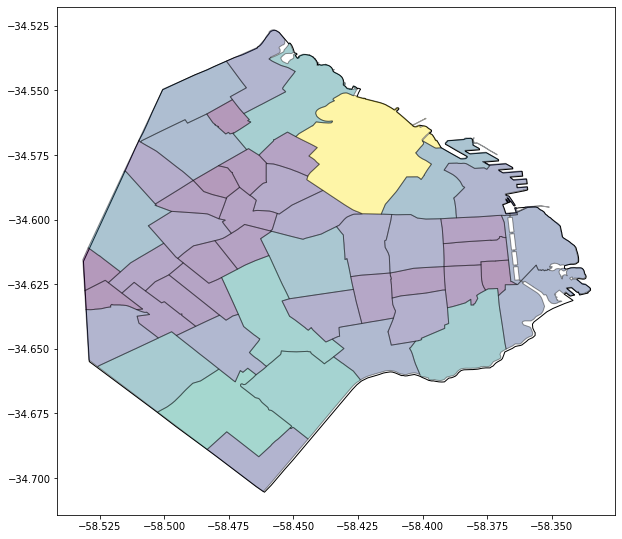

In [26]:
# source: https://data.buenosaires.gob.ar/dataset/barrios
barrios_capital = gpd.read_file('./poligonos/barrios_solo_capital.geojson')
ax = capital.plot(color='white', edgecolor='black', figsize = (10,10))
barrios_capital.plot(column = 'area', ax = ax, alpha = 0.4, edgecolor = 'k')


In [27]:
# Comunas Capital Federal
# source: https://data.buenosaires.gob.ar/dataset/comunas
comunas_capital = gpd.read_file('./poligonos/CABA_comunas.geojson')
comunas_capital

,BARRIOS,PERIMETRO,AREA,COMUNAS,ID,OBJETO,geometry
0,RECOLETA,21452.838648,6.317265e+06,2.0,1,LIMITE COMUNAL,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002..."
1,ALMAGRO - BOEDO,12323.432479,6.660603e+06,5.0,2,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282..."
2,CABALLITO,10990.964471,6.851029e+06,6.0,3,LIMITE COMUNAL,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056..."
3,FLORES - PARQUE CHACABUCO,17972.257870,1.242290e+07,7.0,4,LIMITE COMUNAL,"MULTIPOLYGON (((-58.45200 -34.62975, -58.45158..."
4,LINIERS - MATADEROS - PARQUE AVELLANEDA,21411.738344,1.650531e+07,9.0,5,LIMITE COMUNAL,"MULTIPOLYGON (((-58.51925 -34.63301, -58.51908..."
5,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07,10.0,6,LIMITE COMUNAL,"MULTIPOLYGON (((-58.48834 -34.62016, -58.48820..."
6,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07,11.0,7,LIMITE COMUNAL,"MULTIPOLYGON (((-58.49838 -34.59637, -58.49718..."
7,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07,12.0,8,LIMITE COMUNAL,"MULTIPOLYGON (((-58.50331 -34.59386, -58.50347..."
8,PALERMO,22126.531858,1.584587e+07,14.0,9,LIMITE COMUNAL,"MULTIPOLYGON (((-58.42676 -34.55202, -58.42676..."
9,BALVANERA - SAN CRISTOBAL,10486.260809,6.385991e+06,3.0,10,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41192 -34.59800, -58.41029..."


<AxesSubplot:>

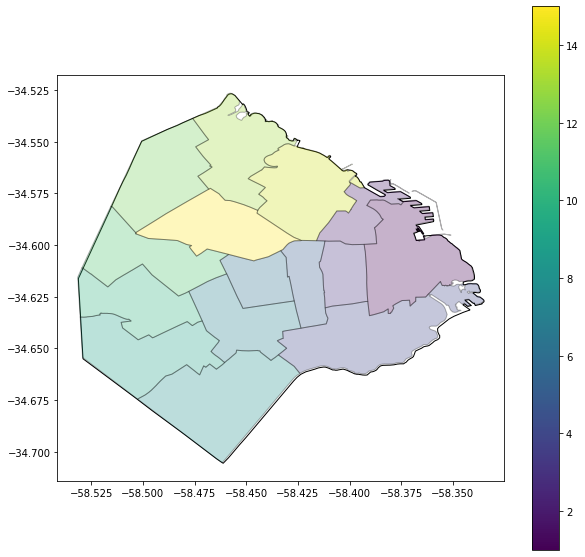

In [28]:
ax = capital.plot(color='white', edgecolor='black', figsize = (10,10))
comunas_capital.plot( column = 'COMUNAS', ax = ax, alpha = 0.3, edgecolor = 'k', legend = True)

<AxesSubplot:>

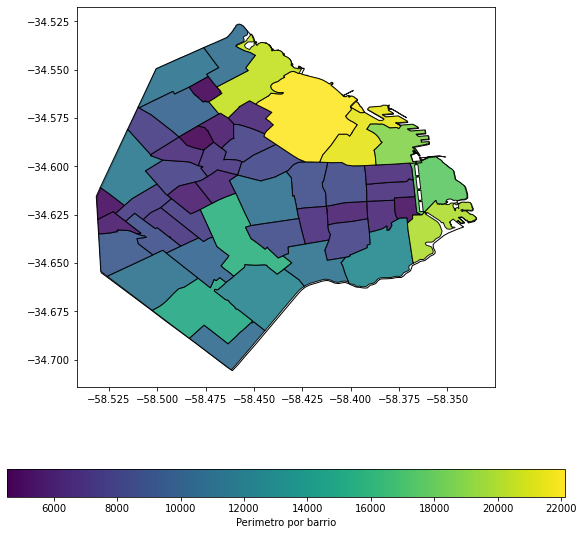

In [29]:
ax = capital.plot(color='white', edgecolor='black', figsize = (10,10))
#comunas_capital.plot( ax = ax, alpha = 0.3, edgecolor = 'k', linewidth=3.5)
barrios_capital.plot(column = 'perimetro', ax = ax, alpha = .9, edgecolor = 'k', legend = True,
                     legend_kwds={'label': "Perimetro por barrio", 'orientation': "horizontal"})


In [38]:
geom_list = [shapely.geometry.Point(-58.428409,-34.6062678)]
geom_list

In [39]:
# Probando data points
HI =gpd.GeoDataFrame( { 'Sede' : 'CENTRAL',
                'Provincia' : 'CIUDAD AUTONOMA DE BUENOS AIRES',
                'Provincia_ID' : 2,
                'Localidad' : 'ALMAGRO',
                'Localidad_ID' :  2035010001},
                 geometry = geom_list,
                 index = [0]
                 )
HI

,Sede,Provincia,Provincia_ID,Localidad,Localidad_ID,geometry
0,CENTRAL,CIUDAD AUTONOMA DE BUENOS AIRES,2,ALMAGRO,2035010001,POINT (-58.42841 -34.60627)


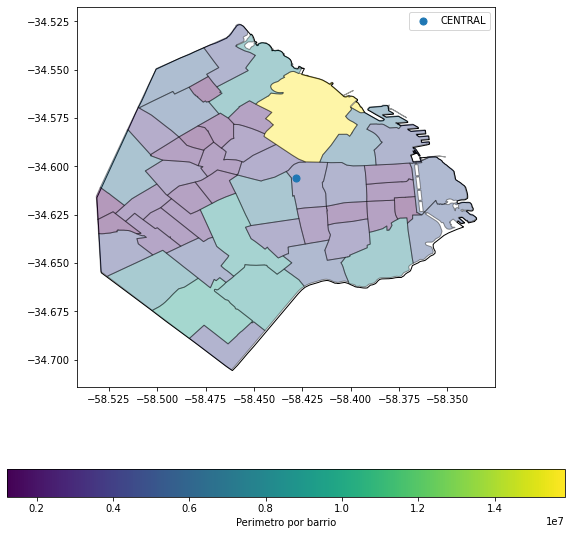

In [55]:
ax = capital.plot(color='white', edgecolor='black', figsize = (10,10))
barrios_capital.plot(column = 'area', ax = ax, alpha = 0.4, edgecolor = 'k', legend = True,
                     legend_kwds={'label': "Perimetro por barrio", 'orientation': "horizontal"})
HI.plot(ax = ax , markersize = 50)
plt.legend(HI['Sede'])

In [73]:
import geopy.distance as dist

In [42]:
dist.distance((-58.4585, -30.60627),(-58.42840, -34.60627)).km

233.58973595354752

In [44]:
HI.distance(shapely.geometry.Point(-58.4585, -30.60627))

0    4.000111
dtype: float64

# Vamos a asignar a cada usuario su institucion mas cercana

In [51]:
sedes = pd.read_csv('geo_data/SEDES_HI.csv')

In [ ]:
# Codigo que use para popular las sedes
'''
locs = []
for loc,prov in zip(sedes.localidad,sedes.provincia):
    data = georefar.get_centroides('localidades',loc, max = 1, provincia = prov)
    locs.append(data)
sedes['loc_id'] = [georefar.getFromDict(x[0],'id') for x in locs]
sedes['latitud'] = None
sedes['longitud'] = None
sedes.drop(columns='geometry', inplace = True)

sedes.to_csv('geo_data/SEDES_HI.csv', index_label=False, index = False)
'''

In [443]:
def getDistances(row, df_distancias, nivel = 'localidad'):
    '''
    Para cada row de un dataset devuelve una lista de tuplas con las distancias a las diferentes sedes.
    '''
    niveles = {'municipio' : ('centroide_lat_municipio', 'centroide_lon_municipio'),
               'localidad' : ('centroide_lat_localidad', 'centroide_lon_localidad'),
               'provincia' : ('centroide_lat_provincia', 'centroide_lon_provincia'),
               'departamento': ('centroide_lat_departamento', 'centroide_lon_departamento')
              }
    dist_to_sede = []
    lat, lon = niveles[nivel] #  assign lat lon 
    lat_user, lon_user = row[lat], row[lon]
    if (not isinstance(row[lat], float)) or (pd.isna(row[lat])):
        return None # Si no hay coordenadas para poder calcular distancia devolve None
    #Si hay coordenadas calcula las distancias
    dist_to_sede = df_distancias.apply(lambda x: round(geopy.distance.distance((lon_user,lat_user), (x.longitud, x.latitud)).km, 3),
                                       axis = 1)
    #Realiza arrreglos a la matrix
    matrix = np.array([dist_to_sede,df_distancias.tipo, df_distancias.sede]).T
    return matrix 

In [433]:
def minPorTipo(matrix, tipo = None):
    if tipo:
        sedes_dist = []
        for t in tipo:
            val = matrix[matrix[:,1] == t] #sort by tipo
            idx = (val[:,0]).argsort()[:1] # N index sorted by minimum distance value
            sedes_dist.append(val[idx][0])
        return sedes_dist
    else:
        idx = (matrix[:,0]).argsort()[:1]
        return matrix[idx]
    

In [431]:
def getMinPorTipo(row, df_distancias, nivel = 'localidad', tipo = None):
    m = getDistances(row, df_distancias, nivel = nivel)
    if m is None:
        return None
    return minPorTipo(m, tipo = tipo)

In [437]:
centro_cercano = USUARIOS.apply(getMinPorTipo, args = [sedes, 'localidad', None],  axis = 1)

In [438]:
centro_cercano

copy_index
0                                                     None
1                                                     None
2        [[4.453636810966153, CENTRO PERIFERICO, ITUZAI...
3        [[40.617887932060476, CENTRO PERIFERICO, MORENO]]
4                                                     None
                               ...                        
87397                                                 None
87398            [[1.9410076685160196, HOSPITAL, CENTRAL]]
87399                                                 None
87400                                                 None
87401                                                 None
Length: 87402, dtype: object

In [439]:
USUARIOS['sede_mas_cercana'] = centro_cercano

In [562]:
USUARIOS.head()

,anio_ing,nacionalidad,provincia_part,loc_part,cp_part,user_id,provincia_por_cp,localidad_por_cp,departamento_por_cp,localidad_por_API,localidad_id_API,municipio_por_API,municipio_id_API,departamento_por_API,departamento_id_API,provincia_por_API,provincia_id_API,centroide_lat_localidad,centroide_lon_localidad,centroide_lat_municipio,centroide_lon_municipio,centroide_lat_departamento,centroide_lon_departamento,centroide_lat_provincia,centroide_lon_provincia,sede_mas_cercana
copy_index,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2014,AR,CF,CABA,1416,ID_0,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,-34.614493,-58.445856,None
1,2014,AR,CF,CABA,1416,ID_1,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,-34.614493,-58.445856,None
2,2014,AR,BA,HURLINGHAM,1686,ID_2,BUENOS AIRES,HURLINGHAM,None,HURLINGHAM,06408010001,HURLINGHAM,60408,HURLINGHAM,6408,BUENOS AIRES,6,-34.5931,-58.6357,-34.5992,-58.6497,-34.5992,-58.6497,-36.676942,-60.558832,"[[4.453636810966153, CENTRO PERIFERICO, ITUZAI..."
3,2014,AR,BA,ZARATE,2800,ID_3,BUENOS AIRES,NO UNICA LOCALIDAD,None,ZARATE,NaN,ZÁRATE,60882,ZÁRATE,6882,BUENOS AIRES,6,-34.0999,-59.0246,-33.9971,-59.1285,-33.9971,-59.1285,-36.676942,-60.558832,"[[40.617887932060476, CENTRO PERIFERICO, MORENO]]"
4,2014,AR,CF,CABA,1425,ID_4,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,NO HUBO REQUEST,-34.614493,-58.445856,None


---

# Exploremos graficar un usuario y su centro de atencion mas cercano

In [541]:
USUARIOS[(USUARIOS.provincia_id_API == 2) & (USUARIOS.localidad_por_API != 'NO HUBO REQUEST')]

,anio_ing,nacionalidad,provincia_part,loc_part,cp_part,user_id,provincia_por_cp,localidad_por_cp,departamento_por_cp,localidad_por_API,localidad_id_API,municipio_por_API,municipio_id_API,departamento_por_API,departamento_id_API,provincia_por_API,provincia_id_API,centroide_lat_localidad,centroide_lon_localidad,centroide_lat_municipio,centroide_lon_municipio,centroide_lat_departamento,centroide_lon_departamento,centroide_lat_provincia,centroide_lon_provincia,sede_mas_cercana
copy_index,,,,,,,,,,,,,,,,,,,,,,,,,,
36,2014,AR,CF,CABA,1177,ID_36,CIUDAD AUTONOMA DE BUENOS AIRES,PALERMO,COMUNA 14,PALERMO,02098010001,NO HUBO REQUEST,NaN,COMUNA 14,2098,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,-34.5739,-58.4224,NaN,NaN,-34.5738,-58.4222,-34.614493,-58.445856,"[[1.9410076685160196, HOSPITAL, CENTRAL]]"
45,2014,AR,CF,CABA,1182,ID_45,CIUDAD AUTONOMA DE BUENOS AIRES,PALERMO,COMUNA 14,PALERMO,02098010001,NO HUBO REQUEST,NaN,COMUNA 14,2098,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,-34.5739,-58.4224,NaN,NaN,-34.5738,-58.4222,-34.614493,-58.445856,"[[1.9410076685160196, HOSPITAL, CENTRAL]]"
106,2014,AR,CF,CABA,1118,ID_106,CIUDAD AUTONOMA DE BUENOS AIRES,RECOLETA,COMUNA 2,RECOLETA,02014010001,NO HUBO REQUEST,NaN,COMUNA 2,2014,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,-34.5859,-58.395,NaN,NaN,-34.5858,-58.3949,-34.614493,-58.445856,"[[0.8369513365609074, CENTRO PERIFERICO, BARRI..."
115,2014,AR,CF,CABA,1264,ID_115,CIUDAD AUTONOMA DE BUENOS AIRES,PARQUE PATRICIOS,COMUNA 4,PARQUE PATRICIOS,02028010004,NO HUBO REQUEST,NaN,COMUNA 4,2028,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,-34.6375,-58.4017,NaN,NaN,-34.6421,-58.3875,-34.614493,-58.445856,"[[2.564471260311976, CENTRO PERIFERICO, BARRIO..."
117,2014,AR,CF,CABA,1206,ID_117,CIUDAD AUTONOMA DE BUENOS AIRES,CONSTITUCIÓN,COMUNA 1,CONSTITUCION,02007010001,NO HUBO REQUEST,NaN,COMUNA 1,2007,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,-34.625,-58.3844,NaN,NaN,-34.6064,-58.3715,-34.614493,-58.445856,"[[1.7416454333794535, CENTRO PERIFERICO, BARRI..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87330,2019,AR,CF,CDAD AUTONOMA BS AS,1093,ID_87330,CIUDAD AUTONOMA DE BUENOS AIRES,MONTSERRAT,COMUNA 1,MONSERRAT,02007010002,NO HUBO REQUEST,NaN,COMUNA 1,2007,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,-34.6127,-58.3797,NaN,NaN,-34.6064,-58.3715,-34.614493,-58.445856,"[[1.5472715146251719, CENTRO PERIFERICO, BARRI..."
87334,2019,AR,CF,CDAD AUTONOMA BS AS,1095,ID_87334,CIUDAD AUTONOMA DE BUENOS AIRES,MONTSERRAT,COMUNA 1,MONSERRAT,02007010002,NO HUBO REQUEST,NaN,COMUNA 1,2007,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,-34.6127,-58.3797,NaN,NaN,-34.6064,-58.3715,-34.614493,-58.445856,"[[1.5472715146251719, CENTRO PERIFERICO, BARRI..."
87335,2019,AR,CF,CDAD AUTONOMA BS AS,1201,ID_87335,CIUDAD AUTONOMA DE BUENOS AIRES,BALVANERA,COMUNA 3,BALVANERA,02021010001,NO HUBO REQUEST,NaN,COMUNA 3,2021,CIUDAD AUTÓNOMA DE BUENOS AIRES,2,-34.6091,-58.4031,NaN,NaN,-34.6138,-58.4027,-34.614493,-58.445856,"[[1.449402649876761, CENTRO PERIFERICO, BARRIO..."


In [555]:
usuario = USUARIOS.iloc[117] #elegimos uno al azar de capital
cerca = sedes[sedes.sede == usuario.sede_mas_cercana[0][2]].copy() #sede mas cercana
geometry = [shapely.geometry.Point(cerca.longitud,cerca.latitud)] # geometria de la sede cercana

In [556]:
sede_cercana = gpd.GeoDataFrame( { 'Sede' : cerca.sede.values,
                'Provincia' : cerca.provincia.values,
                'Provincia_ID' : cerca.prov_id.values,
                'Localidad' : cerca.localidad.values},
                 geometry = geometry,
                 index = [0]
                 )

In [557]:
usuario_geom = [shapely.geometry.Point(usuario.centroide_lon_localidad, usuario.centroide_lat_localidad)]
usuario_df = gpd.GeoDataFrame( { 'Usuario' : usuario.user_id,
                'Provincia' : usuario.provincia_por_API,
                'Provincia_ID' : usuario.provincia_id_API,
                'Localidad' : usuario.localidad_por_API},
                 geometry = usuario_geom,
                 index = [0]
                 )

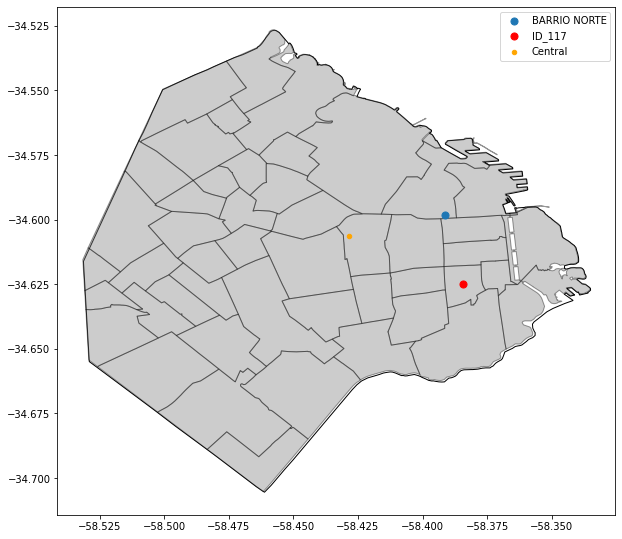

In [561]:
ax = capital.plot(color='white', edgecolor='black', figsize = (10,10), legend = True)
barrios_capital.plot(column = None, ax = ax, alpha = 0.4, edgecolor = 'k', color = 'gray')
                     #,legend = True, legend_kwds={'label': "Perimetro por barrio", 'orientation': "horizontal"})
sede_cercana.plot(ax = ax , markersize = 50,  label =  sede_cercana.Sede[0])
usuario_df.plot(ax = ax, markersize = 50, color = 'red', label =  usuario_df.Usuario[0])
HI.plot(ax = ax, markersize = 20, color = 'orange', label = 'Central' )
plt.legend()
#plt.legend(usuario_df.Usuario)

In [559]:
usuario

anio_ing                                                                   2014
nacionalidad                                                                 AR
provincia_part                                                               CF
loc_part                                                                   CABA
cp_part                                                                    1206
user_id                                                                  ID_117
provincia_por_cp                                CIUDAD AUTONOMA DE BUENOS AIRES
localidad_por_cp                                                   CONSTITUCIÓN
departamento_por_cp                                                    COMUNA 1
localidad_por_API                                                  CONSTITUCION
localidad_id_API                                                    02007010001
municipio_por_API                                               NO HUBO REQUEST
municipio_id_API                        

In [554]:
getMinPorTipo(usuario, sedes, tipo = ['CENTRO PERIFERICO', 'HOSPITAL'])

[array([2.564, 'CENTRO PERIFERICO', 'BARRIO NORTE'], dtype=object),
 array([3.315, 'HOSPITAL', 'CENTRAL'], dtype=object)]